In [1]:
import pandas as pd 
import nltk 
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Baki
[nltk_data]     Akgun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
data = pd.read_csv("imdb_reviews_ratings.csv")
df = data.copy()

In [4]:
def getting_primary_info(df):
    print("------------------------------------------------------")
    print("Veri setinin şekli", df.shape)
    print("------------------------------------------------------")
    print("Veri seti değişken tipleri:\n", df.dtypes)
    print("------------------------------------------------------")
    print("Veri setinin ilk 5 satırı")
    display(HTML(df.head().to_html()))
    print("------------------------------------------------------")
    print("Veri setinin istatistiki verileri")
    description = df.describe()
    display(HTML(description.to_html()))
    print("------------------------------------------------------")  
getting_primary_info(df)

------------------------------------------------------
Veri setinin şekli (93449, 8)
------------------------------------------------------
Veri seti değişken tipleri:
 movie_id               object
movie_title            object
genres                 object
review_id              object
review                 object
found_helpful         float64
found_helpful_rate    float64
rating                float64
dtype: object
------------------------------------------------------
Veri setinin ilk 5 satırı


,movie_id,movie_title,genres,review_id,review,found_helpful,found_helpful_rate,rating
0,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8168012,"Wow. The first Top Gun is a classic, and as we all know, sequels/remakes rarely beat the original, especially 36 years later e.g. The Matrix Resurrections. Well, this film just broke that theory.Aside from the adrenaline-pumping edge or your seat action, this story also had heart. It successfully overachieves, and surpasses its predecessor on every level.The directing by novice Joseph Kosinski was outstanding, especially considering this was his fourth ever full length feature film. All the stunts, visuals and V/SFX were breathtaking, and the camera work perfection, that you'll feel you're in the cockpit of the jet. The soundtrack and score was amazing. The 131 min runtime literally flew by with its spot-on pacing. I actually wanted to see more. Casting and performances by all were also perfection, and once again Tom Cruise reminds us why he is still one of the top actors in the industry.There's nothing I can critique or wish was better, as this gem was perfect in every way. Absolutely stunning, action-packed with a compelling and emotional story, as well as being a visual masterpiece. And the fact the dog fights were real and not CGI (actors had to train to fly the jets), just makes this film that much more magnificent. I'll be definitely seeing this again and adding the DVD to my collection. It's a rare perfect 10/10 must see from me.",2736.0,0.88,1.0
1,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8177338,"If you were a late teen or in your early twenties in the mid 1980's the world was very different. No computers, no mobile phones, no internet, no DVD's. We had cars though, and bikes, and we loved them, and we loved films too. The original Top Gun captured this moment in time perfectly, and gave us a thrilling ride like we had never seen before. The humour, the games, the bikes, the aircraft and my word, those flying scenes. We went back to the cinema to see it again and again, and spent the following decades quoting the movie. As time went on, it remained like a static snapshot in time to perfectly represent that magical point in our lives for so many of us.Now, 36 years later, we are a generation that has lost our parents, we've had our own children who have moved on themselves, and we now approach the end of our own careers and our young selves are gone forever.This film is the missing bookend to that whole generation. The original was there for the start of our young adult lives, and this new film now marks the end. It's magnificent.I'm 55, but yesterday, just for one last night, I was 19 again. Thank you.",5330.0,0.95,1.0
2,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8173679,"In one of the more memorable lines in the original Top Gun, Maverick gets chewed out by a superior who tells him, ""Son, your ego's writing checks your body can't cash."" Sometimes I wonder if Tom Cruise took that putdown as a personal challenge. No movie star seems to work harder or push himself further than Cruise these days. Ridiculously entertaining Top Gun: Maverick. Cruise was in his early 20s when he first played Pete ""Maverick"" Mitchell, the cocky young Navy pilot with the aviator sunglasses, the Kawasaki motorcycle and the need for speed. In the sequel, he's as arrogant and insubordinate as ever: Now a Navy test pilot in his late 50s, Maverick still knows how to tick off his superiors, as we see in an exciting opening sequence where he pushes a new plane beyond its limits. Partly as punishment, he's ordered to return to TOPGUN, the elite pilot-training school, and train its best and brightest for an impossibly dangerous new mission. And so the three screenwriters of Top Gun: Maverick - including Cruise's regular Mission: Impossible writer-director, Christopher McQuarrie - have taken the threads of the original and spun them into an intergenerational male weepie, a dad movie 

------------------------------------------------------
Veri setinin istatistiki verileri


,found_helpful,found_helpful_rate,rating
count,93449.000000,91961.000000,93445.000000
mean,35.699819,0.702189,0.626121
std,94.279334,0.201091,0.274538
min,0.000000,0.000000,0.100000
25%,4.000000,0.580000,0.400000
50%,11.000000,0.710000,0.700000
75%,29.000000,0.840000,0.800000
max,5330.000000,1.000000,1.000000


------------------------------------------------------


In [5]:
sid = SentimentIntensityAnalyzer()

sentiments = []
for review in df['review']:
    sentiment_score = sid.polarity_scores(review)
    sentiments.append(sentiment_score)

sentiments_df = pd.DataFrame(sentiments)
df = pd.concat([df, sentiments_df], axis=1)

In [6]:
df.head(10)

,movie_id,movie_title,genres,review_id,review,found_helpful,found_helpful_rate,rating,neg,neu,pos,compound
0,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8168012,"Wow. The first Top Gun is a classic, and as we...",2736.0,0.88,1.0,0.036,0.729,0.235,0.9944
1,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8177338,If you were a late teen or in your early twent...,5330.0,0.95,1.0,0.051,0.834,0.115,0.9211
2,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8173679,In one of the more memorable lines in the orig...,1223.0,0.85,1.0,0.054,0.812,0.134,0.9829
3,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8178255,This is one sequel that looked like it would n...,983.0,0.85,1.0,0.127,0.637,0.237,0.9922
4,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8177954,"I was reluctantly dragged into the theater, th...",1885.0,0.90,1.0,0.163,0.812,0.024,-0.7227
5,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8189765,If there's any movie that deserves to be seen ...,1071.0,0.86,1.0,0.071,0.742,0.187,0.5983
6,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8174934,"What an excellent sequel - I, in fact, like it...",658.0,0.80,0.9,0.030,0.646,0.324,0.9982
7,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8178881,"Top Gun (1986) made Tom Cruise a star, and now...",641.0,0.77,1.0,0.021,0.812,0.167,0.9708
8,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8186445,5 out of 5 stars.Top Gun Maverick is an awesom...,399.0,0.75,1.0,0.022,0.709,0.269,0.9976
9,tt1745960,Top Gun: Maverick,"['Action', 'Drama']",rw8184290,See? This is why I LOVE Tom Cruise Post-Mid-19...,406.0,0.74,0.9,0.074,0.734,0.192,0.9970


In [7]:
grouped_df = df.groupby('movie_id')['compound'].mean().reset_index()


In [8]:
grouped_df.shape

(4815, 2)

In [9]:
uni = grouped_df["compound"].unique()
print(len(uni))

4804


In [10]:
for movie_id in grouped_df['movie_id']:
   
    compound_value = grouped_df[grouped_df['movie_id'] == movie_id]['compound'].values[0]
   
    df.loc[df['movie_id'] == movie_id, 'movie_title'] = compound_value

In [11]:
df.drop(columns="movie_id", inplace=True)
df.drop(columns="review_id", inplace=True)

In [12]:
df.dropna(subset=['genres'], inplace=True)

In [13]:
df.head()

,movie_title,genres,review,found_helpful,found_helpful_rate,rating,neg,neu,pos,compound
0,0.801308,"['Action', 'Drama']","Wow. The first Top Gun is a classic, and as we...",2736.0,0.88,1.0,0.036,0.729,0.235,0.9944
1,0.801308,"['Action', 'Drama']",If you were a late teen or in your early twent...,5330.0,0.95,1.0,0.051,0.834,0.115,0.9211
2,0.801308,"['Action', 'Drama']",In one of the more memorable lines in the orig...,1223.0,0.85,1.0,0.054,0.812,0.134,0.9829
3,0.801308,"['Action', 'Drama']",This is one sequel that looked like it would n...,983.0,0.85,1.0,0.127,0.637,0.237,0.9922
4,0.801308,"['Action', 'Drama']","I was reluctantly dragged into the theater, th...",1885.0,0.90,1.0,0.163,0.812,0.024,-0.7227


In [14]:
df = df.drop_duplicates()

In [15]:
uni = df["genres"].unique()
unique_genres_set = set()
for genres_list in uni:
    genres = genres_list.strip('[]').split(', ')
    unique_genres_set.update(genres)

unique_genres_list = list(unique_genres_set)

In [16]:
for genre in unique_genres_list:
    df[genre] = 0

# Her bir film için türleri kontrol et ve ilgili sütunlara 1 ata
for index, row in df.iterrows():
    genres_str = row['genres']
    if genres_str is not None:
        genres = genres_str.strip('[]').split(', ')
        for genre in genres:
            df.at[index, genre] = 1


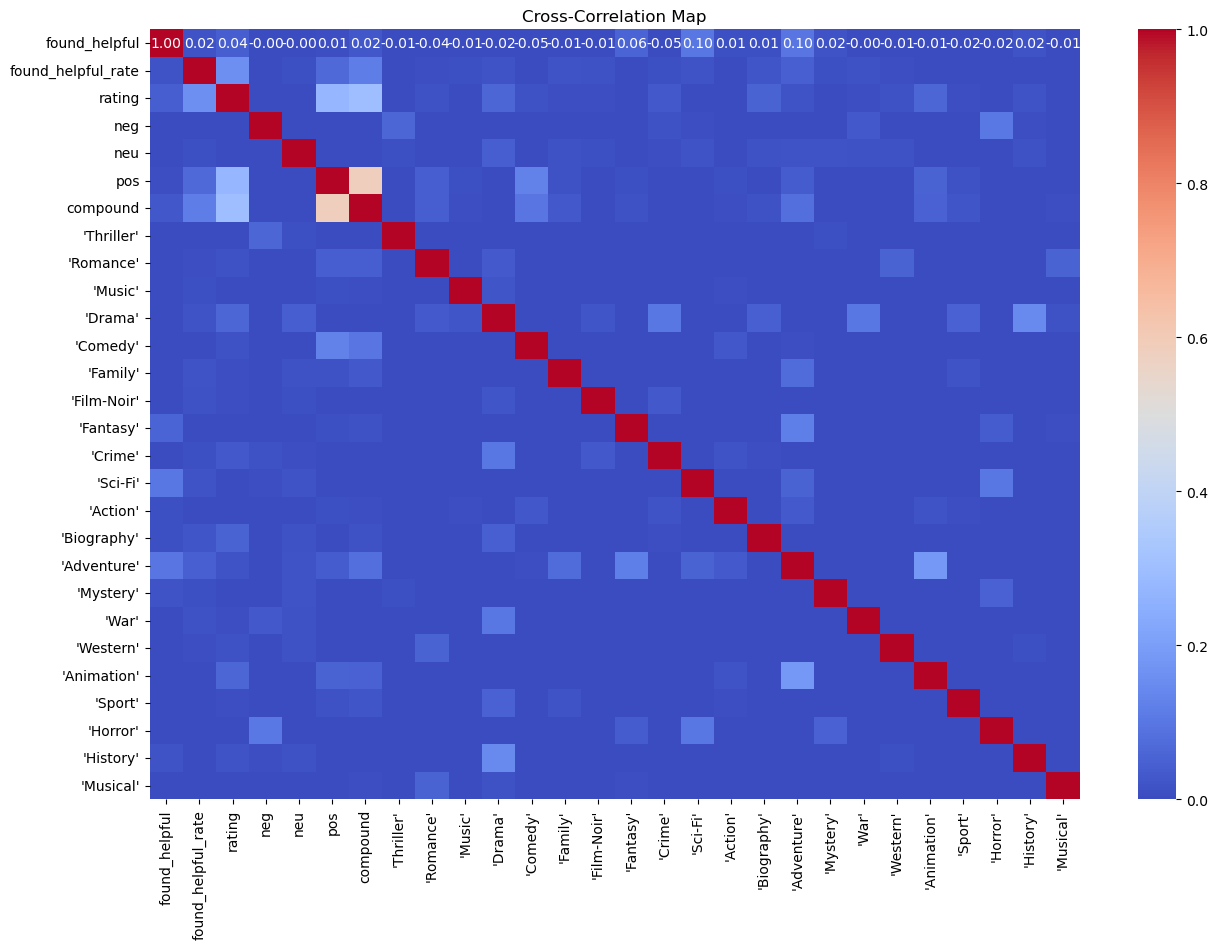

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns 
numeric_df = df.select_dtypes(include=['float64', 'int64', "int32"])

corr_matrix = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=0, vmax=1)
plt.title('Cross-Correlation Map')
plt.show()

In [18]:
# df.drop(columns="genres", inplace=True)
# df.drop(columns="review", inplace=True)

In [19]:
# df.to_csv("imdb_prepared_data.csv")

In [1]:
import pandas as pd 
data = pd.read_csv("imdb_reviews_ratings.csv")
df = data.copy()

In [2]:
def multiply_by_10(x):
    return x * 10

df['rating'] = df['rating'].apply(multiply_by_10)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

df = df.dropna()
X , y = df.drop(columns = ["rating","found_helpful"]) , df["rating"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)
print("Random Forest : ")
model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=2)
model_random_forest.fit(X_train, y_train)

y_pred = model_random_forest.predict(X_test)

r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

print("Gradient Boosting")
model = GradientBoostingRegressor(n_estimators=80, min_samples_split=2)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

ValueError: could not convert string to float: 'tt2101570'